In [1]:
#import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [20]:
# import dataset
fraud=pd.read_csv('Fraud_check.csv')

In [21]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [22]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [23]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [24]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

## Label Encoding

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [26]:
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [27]:
fraud.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'Income', 'City.Population': 'Population',
                    'Work.Experience': 'work_exp'}, inplace= True)
fraud

,Undergrad,marital_status,Income,Population,work_exp,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [28]:
fraud.loc[fraud["Income"] <=30000,"status"]="Risky"        #taxable_income <= 30000 as "Risky" and others are "Good"

fraud.loc[fraud["Income"] >=30000,"status"]="Good"

In [29]:
fraud.head(100)

,Undergrad,marital_status,Income,Population,work_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
95,1,2,41395,121498,28,1,Good
96,0,2,22258,63622,17,0,Risky
97,1,0,79583,37849,19,1,Good
98,1,1,22187,77053,18,1,Risky


In [57]:
fraud.drop(['Income'], axis=1, inplace=True)

In [58]:
label_encoder = preprocessing.LabelEncoder()
fraud['status'] = label_encoder.fit_transform(fraud['status'])

In [59]:
fraud.head(100)

,Undergrad,marital_status,Population,work_exp,Urban,status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
95,1,2,121498,28,1,0
96,0,2,63622,17,0,1
97,1,0,37849,19,1,0
98,1,1,77053,18,1,1


In [60]:
#split the data into dependant and independant variable
x = fraud.iloc[:,0:5]
y = fraud['status']

In [61]:
x

,Undergrad,marital_status,Population,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [62]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int64

In [63]:
y.value_counts()

0    476
1    124
Name: status, dtype: int64

In [64]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=50) 

## building decision tree classifier using entropy criteria

In [65]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [66]:
model.get_n_leaves()

4

In [67]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    119
1      1
dtype: int64

In [68]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
status,,
0,98,1
1,21,0


In [70]:
# Accuracy 
np.mean(preds==y_test)

0.8166666666666667

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(preds, y_test)
print("Confusion Matrix:")
print(result)
result1 = classification_report(preds, y_test)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(preds, y_test)
print("Accuracy:",result2)

Confusion Matrix:
[[98 21]
 [ 1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       119
           1       0.00      0.00      0.00         1

    accuracy                           0.82       120
   macro avg       0.49      0.41      0.45       120
weighted avg       0.98      0.82      0.89       120

Accuracy: 0.8166666666666667


Text(0.5, 1.0, 'Decision tree using Entropy')

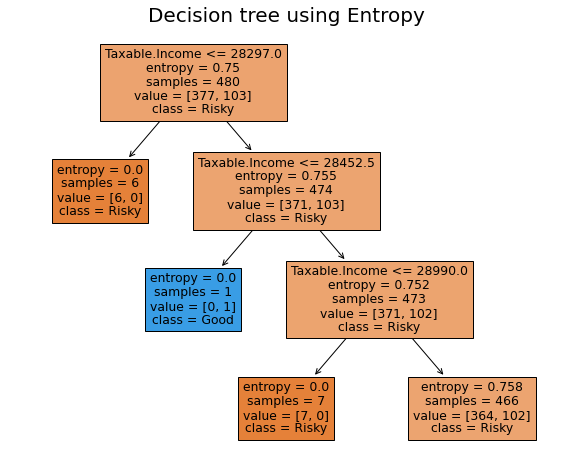

In [80]:
#Decision tree using entropy
fig = plt.figure(figsize=(10,8))
fig=tree.plot_tree(model,
                     feature_names= ['Undergrad', 'marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 
                                     'Urban'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=20)

## Building Decision Tree Classifier (CART) using Gini Criteria

In [81]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [82]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [83]:
model_gini.get_n_leaves()

8

In [ ]:
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

In [84]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [85]:
# Accuracy 
np.mean(preds==y_test)

0.8166666666666667

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(preds, y_test)
print("Confusion Matrix:")
print(result)
result1 = classification_report(preds, y_test)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(preds, y_test)
print("Accuracy:",result2)

Confusion Matrix:
[[98 21]
 [ 1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       119
           1       0.00      0.00      0.00         1

    accuracy                           0.82       120
   macro avg       0.49      0.41      0.45       120
weighted avg       0.98      0.82      0.89       120

Accuracy: 0.8166666666666667


Text(0.5, 1.0, 'Decision tree using Gini criteria')

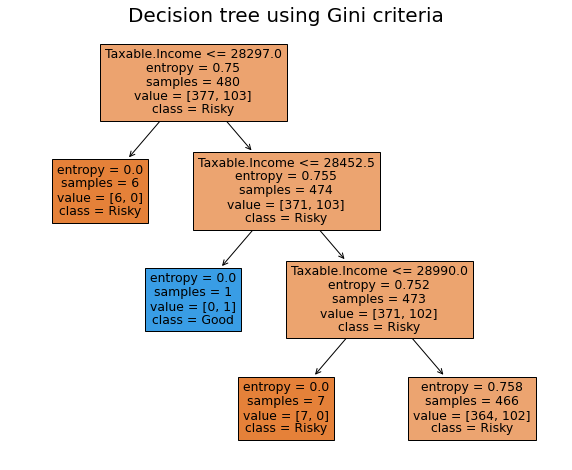

In [87]:
# Decision Tree Classifier (CART) using Gini Criteria
fig = plt.figure(figsize=(10,8))
fig=tree.plot_tree(model,
                     feature_names= ['Undergrad', 'marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 
                                     'Urban'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini criteria',fontsize=20)

## Building Decision Tree Regression

In [88]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

In [89]:
model_R = DecisionTreeRegressor()
model_R.fit(x_train, y_train)

DecisionTreeRegressor()

In [90]:
preds = model_R.predict(x_test) 
preds

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1.])

In [91]:
# Accuracy 
np.mean(preds==y_test)

0.65